,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


(7385, 12)
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Missing values:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
Weight (w): 49.32437344428162
Bias (b): 250.0693310706955
R2 Score: 0.6961484899474774


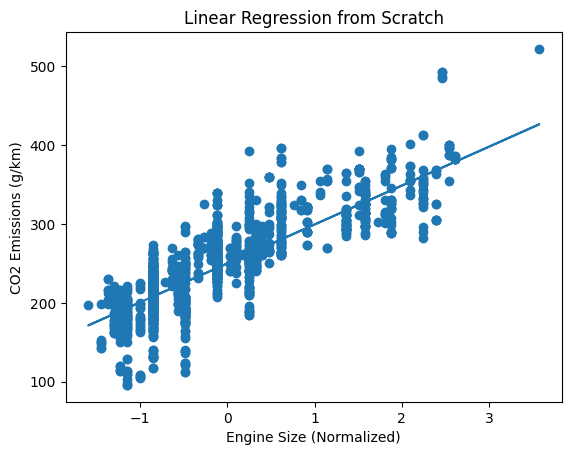

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# =========================
# 1. Load the dataset
# =========================
df = pd.read_csv("co2.csv")

#=========================
#EXPLORATORY DATA ANALYSIS (EDA)
#=========================
display(df.head()) #To see first few rows

print(df.shape)  # Number of rows (data points) , Number of columns (features)
print(df.isnull().sum())
display(df.describe()) #Statistical summary


# =========================
# 2. Check missing values
# =========================
print("Missing values:\n", df.isnull().sum())

# =========================
# 3. Select feature and target
# =========================
X = df["Engine Size(L)"].values
y = df["CO2 Emissions(g/km)"].values

# =========================
# 4. Normalize the feature
# =========================
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean) / X_std

# =========================
# 5. Train–Test Split (80–20)
# =========================
split_index = int(0.8 * len(X))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

# =========================
# 6. Initialize parameters
# =========================
w = 0
b = 0
alpha = 0.01
epochs = 1000000
n = len(X_train)

# =========================
# 7. Gradient Descent
# =========================
for i in range(epochs):
    y_pred = w * X_train + b

    dw = (1/n) * np.sum((y_pred - y_train) * X_train)
    db = (1/n) * np.sum(y_pred - y_train)

    w = w - alpha * dw
    b = b - alpha * db

# =========================
# 8. Predictions on test data
# =========================
y_test_pred = w * X_test + b

# =========================
# 9. R2 Score calculation
# =========================
ss_total = np.sum((y_test - y_test.mean()) ** 2)
ss_residual = np.sum((y_test - y_test_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

print("Weight (w):", w)
print("Bias (b):", b)
print("R2 Score:", r2)

# ====================
# 10. Plot regression result
# =========================
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred)
plt.xlabel("Engine Size (Normalized)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Linear Regression from Scratch")
plt.show()